<a href="https://colab.research.google.com/github/weonyee/fisa04/blob/main/Daycon_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 처리
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv(r"/content/drive/MyDrive/MLDL_Project/data/train.csv")
test_df = pd.read_csv(r"/content/drive/MyDrive/MLDL_Project/data/test.csv")

In [ ]:
train_df.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [ ]:
train_df.head(2)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold

# 불균형 데이터 처리
from imblearn.over_sampling import SMOTE

# warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# 모델 평가
from sklearn.metrics import roc_auc_score

# 딥러닝 모델 (TensorFlow)
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

# TensorFlow GPU 가속 확인
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("✅ GPU 가속 활성화됨!")
else:
    print("⚠️ GPU를 감지할 수 없습니다. CPU에서 실행됩니다.")

✅ GPU 가속 활성화됨!


##### 데이터 로드 및 UID 처리

In [ ]:
# "UID" 컬럼 유지 (제출 파일용)
test_uid = test_df[["UID"]]

# "UID" 컬럼 삭제
train_df.drop(columns=["UID"], inplace=True)
test_df.drop(columns=["UID"], inplace=True)

# X, y 분리
X = train_df.drop(columns=["채무 불이행 여부"])
y = train_df["채무 불이행 여부"]

##### 범주형 변수 처리 (라벨 인코딩 & 원-핫 인코딩)

In [ ]:
categorical_cols = ["주거 형태", "현재 직장 근속 연수", "대출 목적", "대출 상환 기간"]

# 라벨 인코딩 (현재 직장 근속 연수)
label_enc = LabelEncoder()
X["현재 직장 근속 연수"] = label_enc.fit_transform(X["현재 직장 근속 연수"])
test_df["현재 직장 근속 연수"] = label_enc.transform(test_df["현재 직장 근속 연수"])

# 원-핫 인코딩 적용
X = pd.get_dummies(X, columns=["주거 형태", "대출 목적", "대출 상환 기간"], drop_first=False)
test_df = pd.get_dummies(test_df, columns=["주거 형태", "대출 목적", "대출 상환 기간"], drop_first=False)

In [ ]:
col_lst = [col for col in X.columns if col.startswith("주거 형태_") or col.startswith("대출 목적_") or col.startswith("대출 상환 기간_")]
X[col_lst] = X[col_lst].astype(int)
test_df[col_lst] = test_df[col_lst].astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   연간 소득                   10000 non-null  float64
 1   현재 직장 근속 연수             10000 non-null  int64  
 2   체납 세금 압류 횟수             10000 non-null  float64
 3   개설된 신용계좌 수              10000 non-null  int64  
 4   신용 거래 연수                10000 non-null  float64
 5   최대 신용한도                 10000 non-null  float64
 6   신용 문제 발생 횟수             10000 non-null  int64  
 7   마지막 연체 이후 경과 개월 수       10000 non-null  int64  
 8   개인 파산 횟수                10000 non-null  int64  
 9   현재 대출 잔액                10000 non-null  float64
 10  현재 미상환 신용액              10000 non-null  float64
 11  월 상환 부채액                10000 non-null  float64
 12  신용 점수                   10000 non-null  int64  
 13  주거 형태_월세                10000 non-null  int64  
 14  주거 형태_자가                10000 non-null 

##### 수치형 변수 변환 (로그 변환 적용)

In [ ]:
# 로그 변환
log_columns = ["현재 미상환 신용액", "월 상환 부채액", "현재 대출 잔액"]
for col in log_columns:
    X[col] = np.log1p(X[col])
    test_df[col] = np.log1p(test_df[col])

# "마지막 연체 이후 경과 개월 수"가 0이면 "연체 없음" 컬럼 추가
X["연체 없음"] = (X["마지막 연체 이후 경과 개월 수"] == 0).astype(int)
test_df["연체 없음"] = (test_df["마지막 연체 이후 경과 개월 수"] == 0).astype(int)

##### 결측값 처리

In [ ]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test_df)

##### 데이터 스케일링 (StandardScaler 적용)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(test_df)

In [ ]:
# PyTorch 텐서 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

##### 데이터 로더 생성(미니 배치 학습)

In [ ]:
# 데이터 로더 생성 (미니배치 학습을 위해)
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CreditRiskModel(nn.Module):
    def __init__(self, input_dim, first_size, dropout_rate, activation):
        super(CreditRiskModel, self).__init__()
        self.activation = activation  # 활성화 함수를 파라미터로 받음
        self.model = nn.Sequential(
            nn.Linear(input_dim, first_size),
            nn.BatchNorm1d(first_size),
            self.activation(),  # 첫 번째 은닉층에 적용

            nn.Dropout(dropout_rate),
            nn.Linear(first_size, first_size // 2),
            nn.BatchNorm1d(first_size // 2),
            self.activation(),  # 두 번째 은닉층에 적용

            nn.Dropout(dropout_rate),
            nn.Linear(first_size // 2, first_size // 4),
            nn.BatchNorm1d(first_size // 4),
            self.activation(),  # 세 번째 은닉층에 적용

            nn.Dropout(dropout_rate),
            nn.Linear(first_size // 4, first_size // 8),
            self.activation(),  # 네 번째 은닉층에 적용

            nn.Linear(first_size // 8, 1),
            nn.Sigmoid()  # 출력층 (이진 분류를 위한 시그모이드)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# 모델 생성
input_dim = X_train.shape[1]

# GPU 사용 가능하면 이동
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train_and_evaluate(optimizer_name, lr, first_size, dropout_rate, batch_size, activation):
    # 모델 초기화 및 디바이스 설정 (device는 외부에서 정의된 것으로 가정)
    model = CreditRiskModel(input_dim, first_size, dropout_rate, activation)  # CreditRiskModel은 외부에서 정의된 클래스
    model.to(device)

    # 옵티마이저 설정
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)

    # 데이터 로더 설정 (train_dataset, valid_dataset은 외부에서 정의된 것으로 가정)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

    # 손실 함수 및 에포크 수 설정
    criterion = nn.BCELoss()
    num_epochs = 30  # 예시로 50 에포크 설정

    # 손실 및 AUC 기록을 위한 리스트
    train_losses = []
    valid_losses = []
    valid_aucs = []

    # activation 함수 이름 얻기
    activation_name = activation.__name__

    # 학습 루프
    for epoch in range(num_epochs):
        # 학습 모드
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # 평가 모드
        model.eval()
        valid_loss = 0.0
        all_y_pred = []
        all_y_true = []
        with torch.no_grad():
            for X_batch, y_batch in valid_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                valid_loss += loss.item()
                all_y_pred.extend(y_pred.cpu().detach().flatten().numpy())
                all_y_true.extend(y_batch.cpu().detach().flatten().numpy())
        valid_loss /= len(valid_loader)
        valid_losses.append(valid_loss)

        # ROC-AUC 계산
        auc = roc_auc_score(all_y_true, all_y_pred)
        valid_aucs.append(auc)

        # 모델 저장
        # torch.save(model.state_dict(), f"model/{activation}/model_{epoch+1}.pth")

        # 에포크별 결과 출력
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Valid AUC: {auc:.4f}")

    # 학습이 끝난 후 그래프 생성
    epochs = range(1, num_epochs + 1)

    # 손실 그래프
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, valid_losses, label='Valid Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss / {optimizer_name, lr, first_size, dropout_rate, batch_size, activation}')
    plt.legend()

    # AUC 그래프
    plt.subplot(1, 2, 2)
    plt.plot(epochs, valid_aucs, label='Valid AUC', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('Validation ROC-AUC')
    plt.legend()

    # 그래프 출력
    plt.tight_layout()
    plt.show()

    # 최종 성능 반환
    return valid_aucs.index(max(valid_aucs))+1, max(valid_aucs)   # 마지막 에포크의 AUC 반환

# 하이퍼파라미터 튜닝을 위한 재구성

Epoch 1/30 - Train Loss: 0.6224, Valid Loss: 0.5862, Valid AUC: 0.7081
Epoch 2/30 - Train Loss: 0.5869, Valid Loss: 0.5714, Valid AUC: 0.7247
Epoch 3/30 - Train Loss: 0.5770, Valid Loss: 0.5691, Valid AUC: 0.7256
Epoch 4/30 - Train Loss: 0.5753, Valid Loss: 0.5673, Valid AUC: 0.7291
Epoch 5/30 - Train Loss: 0.5678, Valid Loss: 0.5633, Valid AUC: 0.7334
Epoch 6/30 - Train Loss: 0.5699, Valid Loss: 0.5655, Valid AUC: 0.7314
Epoch 7/30 - Train Loss: 0.5677, Valid Loss: 0.5655, Valid AUC: 0.7307
Epoch 8/30 - Train Loss: 0.5632, Valid Loss: 0.5612, Valid AUC: 0.7339
Epoch 9/30 - Train Loss: 0.5642, Valid Loss: 0.5665, Valid AUC: 0.7308
Epoch 10/30 - Train Loss: 0.5641, Valid Loss: 0.5642, Valid AUC: 0.7328
Epoch 11/30 - Train Loss: 0.5610, Valid Loss: 0.5626, Valid AUC: 0.7327
Epoch 12/30 - Train Loss: 0.5572, Valid Loss: 0.5631, Valid AUC: 0.7321
Epoch 13/30 - Train Loss: 0.5571, Valid Loss: 0.5641, Valid AUC: 0.7306
Epoch 14/30 - Train Loss: 0.5565, Valid Loss: 0.5638, Valid AUC: 0.7326
E

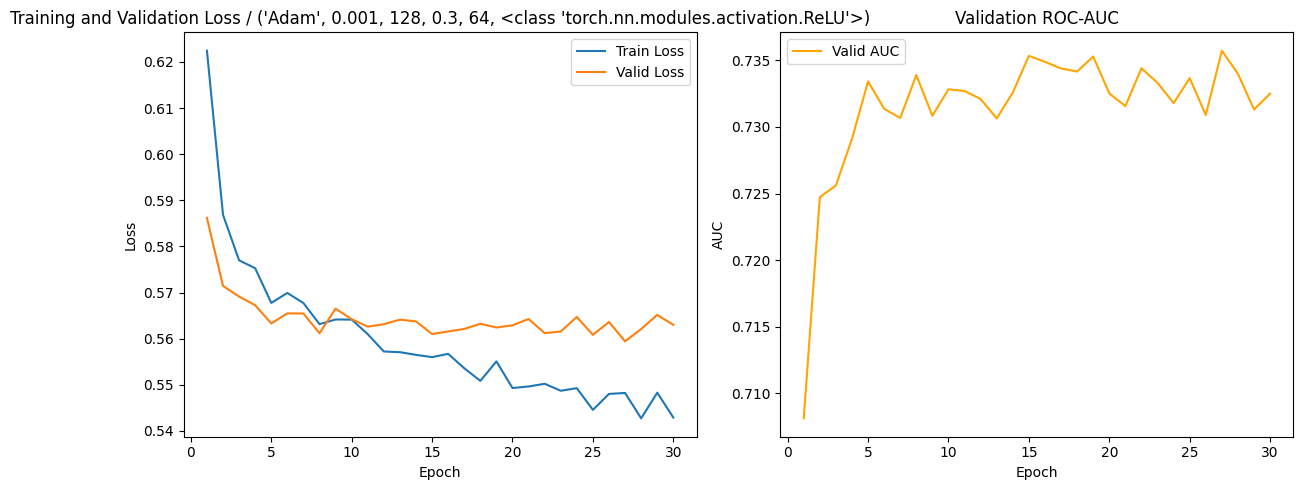

Epoch 1/30 - Train Loss: 0.6137, Valid Loss: 0.5832, Valid AUC: 0.7160
Epoch 2/30 - Train Loss: 0.5899, Valid Loss: 0.5751, Valid AUC: 0.7226
Epoch 3/30 - Train Loss: 0.5802, Valid Loss: 0.5686, Valid AUC: 0.7287
Epoch 4/30 - Train Loss: 0.5784, Valid Loss: 0.5707, Valid AUC: 0.7257
Epoch 5/30 - Train Loss: 0.5722, Valid Loss: 0.5664, Valid AUC: 0.7293
Epoch 6/30 - Train Loss: 0.5675, Valid Loss: 0.5697, Valid AUC: 0.7244
Epoch 7/30 - Train Loss: 0.5635, Valid Loss: 0.5682, Valid AUC: 0.7275
Epoch 8/30 - Train Loss: 0.5631, Valid Loss: 0.5674, Valid AUC: 0.7288
Epoch 9/30 - Train Loss: 0.5663, Valid Loss: 0.5657, Valid AUC: 0.7282
Epoch 10/30 - Train Loss: 0.5625, Valid Loss: 0.5635, Valid AUC: 0.7311
Epoch 11/30 - Train Loss: 0.5647, Valid Loss: 0.5651, Valid AUC: 0.7300
Epoch 12/30 - Train Loss: 0.5604, Valid Loss: 0.5662, Valid AUC: 0.7298
Epoch 13/30 - Train Loss: 0.5590, Valid Loss: 0.5626, Valid AUC: 0.7338
Epoch 14/30 - Train Loss: 0.5637, Valid Loss: 0.5649, Valid AUC: 0.7292
E

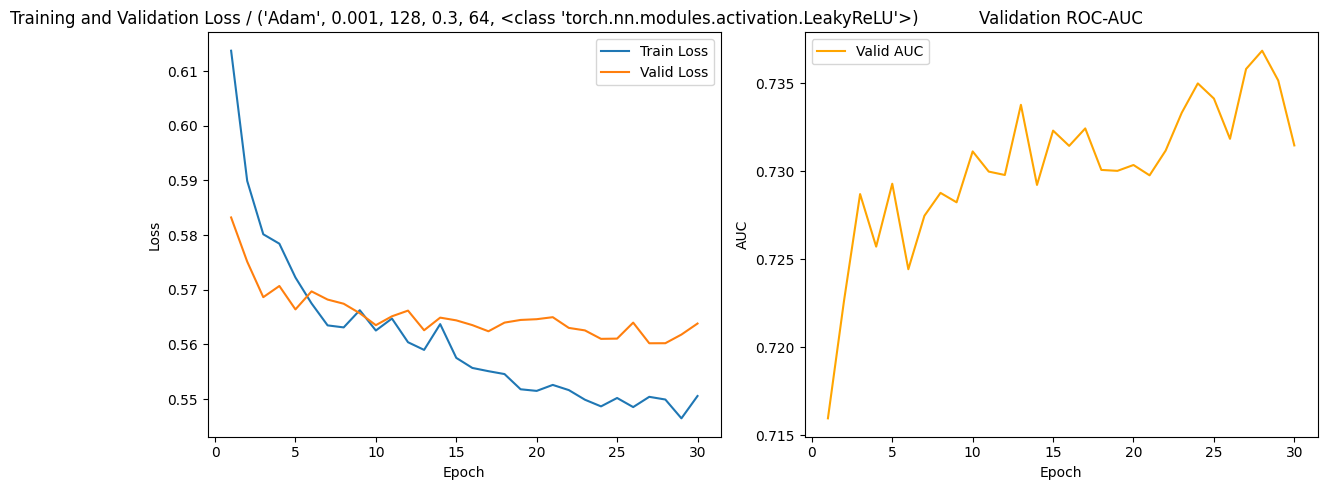

Epoch 1/30 - Train Loss: 0.6038, Valid Loss: 0.5753, Valid AUC: 0.7164
Epoch 2/30 - Train Loss: 0.5810, Valid Loss: 0.5718, Valid AUC: 0.7220
Epoch 3/30 - Train Loss: 0.5801, Valid Loss: 0.5688, Valid AUC: 0.7254
Epoch 4/30 - Train Loss: 0.5768, Valid Loss: 0.5701, Valid AUC: 0.7231
Epoch 5/30 - Train Loss: 0.5726, Valid Loss: 0.5694, Valid AUC: 0.7236
Epoch 6/30 - Train Loss: 0.5689, Valid Loss: 0.5690, Valid AUC: 0.7239
Epoch 7/30 - Train Loss: 0.5703, Valid Loss: 0.5680, Valid AUC: 0.7243
Epoch 8/30 - Train Loss: 0.5684, Valid Loss: 0.5688, Valid AUC: 0.7229
Epoch 9/30 - Train Loss: 0.5664, Valid Loss: 0.5670, Valid AUC: 0.7253
Epoch 10/30 - Train Loss: 0.5660, Valid Loss: 0.5674, Valid AUC: 0.7261
Epoch 11/30 - Train Loss: 0.5660, Valid Loss: 0.5651, Valid AUC: 0.7294
Epoch 12/30 - Train Loss: 0.5663, Valid Loss: 0.5659, Valid AUC: 0.7281
Epoch 13/30 - Train Loss: 0.5669, Valid Loss: 0.5665, Valid AUC: 0.7270
Epoch 14/30 - Train Loss: 0.5638, Valid Loss: 0.5678, Valid AUC: 0.7256
E

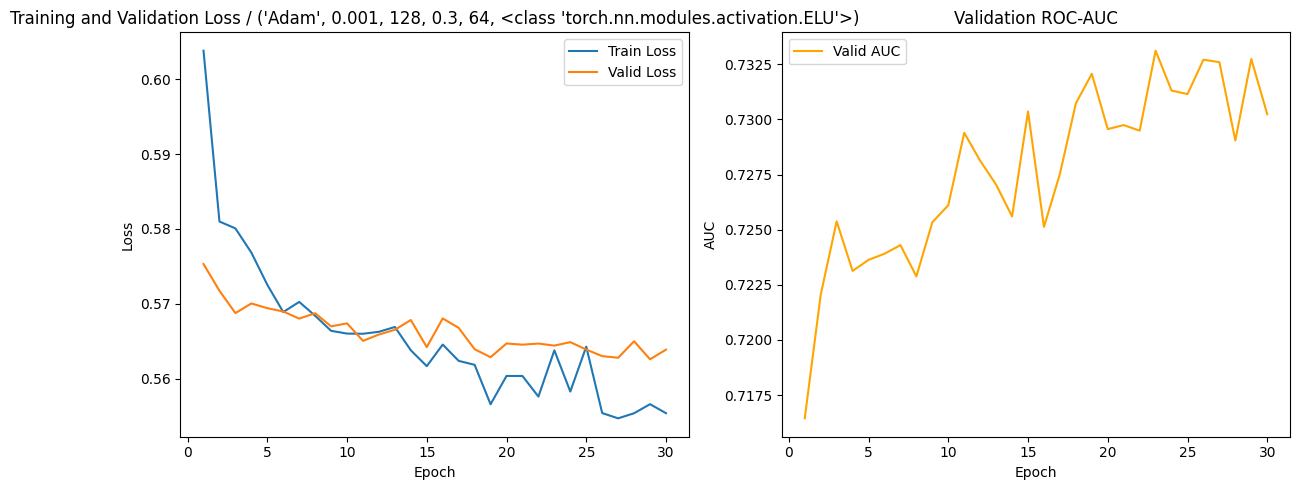

Epoch 1/30 - Train Loss: 0.6460, Valid Loss: 0.5761, Valid AUC: 0.7203
Epoch 2/30 - Train Loss: 0.5757, Valid Loss: 0.5695, Valid AUC: 0.7235
Epoch 3/30 - Train Loss: 0.5650, Valid Loss: 0.5657, Valid AUC: 0.7279
Epoch 4/30 - Train Loss: 0.5586, Valid Loss: 0.5651, Valid AUC: 0.7293
Epoch 5/30 - Train Loss: 0.5558, Valid Loss: 0.5679, Valid AUC: 0.7264
Epoch 6/30 - Train Loss: 0.5517, Valid Loss: 0.5635, Valid AUC: 0.7318
Epoch 7/30 - Train Loss: 0.5512, Valid Loss: 0.5688, Valid AUC: 0.7257
Epoch 8/30 - Train Loss: 0.5480, Valid Loss: 0.5679, Valid AUC: 0.7263
Epoch 9/30 - Train Loss: 0.5455, Valid Loss: 0.5711, Valid AUC: 0.7264
Epoch 10/30 - Train Loss: 0.5473, Valid Loss: 0.5699, Valid AUC: 0.7254
Epoch 11/30 - Train Loss: 0.5441, Valid Loss: 0.5681, Valid AUC: 0.7270
Epoch 12/30 - Train Loss: 0.5391, Valid Loss: 0.5798, Valid AUC: 0.7150
Epoch 13/30 - Train Loss: 0.5376, Valid Loss: 0.5680, Valid AUC: 0.7273
Epoch 14/30 - Train Loss: 0.5347, Valid Loss: 0.5721, Valid AUC: 0.7295
E

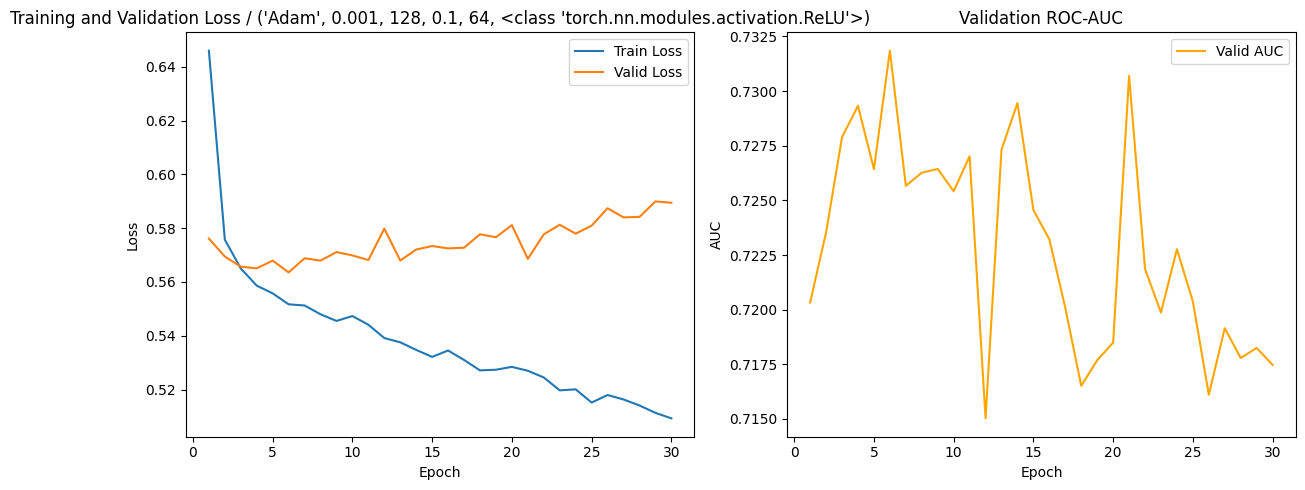

Epoch 1/30 - Train Loss: 0.6232, Valid Loss: 0.5786, Valid AUC: 0.7119
Epoch 2/30 - Train Loss: 0.5746, Valid Loss: 0.5703, Valid AUC: 0.7221
Epoch 3/30 - Train Loss: 0.5664, Valid Loss: 0.5689, Valid AUC: 0.7206
Epoch 4/30 - Train Loss: 0.5621, Valid Loss: 0.5652, Valid AUC: 0.7281
Epoch 5/30 - Train Loss: 0.5541, Valid Loss: 0.5643, Valid AUC: 0.7286
Epoch 6/30 - Train Loss: 0.5548, Valid Loss: 0.5684, Valid AUC: 0.7260
Epoch 7/30 - Train Loss: 0.5482, Valid Loss: 0.5689, Valid AUC: 0.7238
Epoch 8/30 - Train Loss: 0.5495, Valid Loss: 0.5704, Valid AUC: 0.7247
Epoch 9/30 - Train Loss: 0.5484, Valid Loss: 0.5669, Valid AUC: 0.7289
Epoch 10/30 - Train Loss: 0.5428, Valid Loss: 0.5658, Valid AUC: 0.7275
Epoch 11/30 - Train Loss: 0.5408, Valid Loss: 0.5706, Valid AUC: 0.7253
Epoch 12/30 - Train Loss: 0.5426, Valid Loss: 0.5686, Valid AUC: 0.7280
Epoch 13/30 - Train Loss: 0.5406, Valid Loss: 0.5713, Valid AUC: 0.7235
Epoch 14/30 - Train Loss: 0.5391, Valid Loss: 0.5727, Valid AUC: 0.7230
E

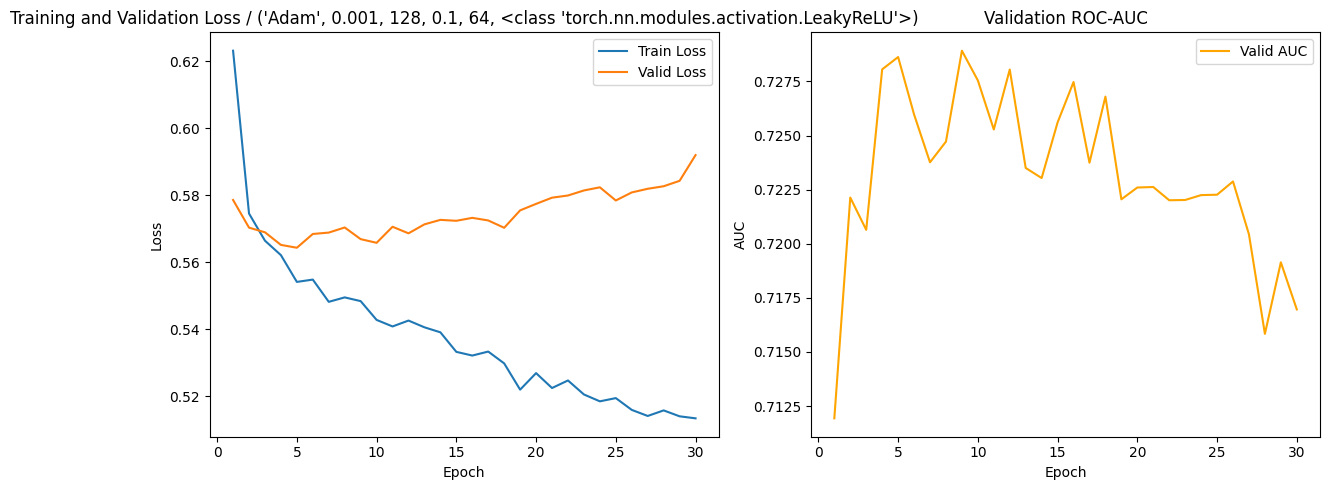

Epoch 1/30 - Train Loss: 0.6082, Valid Loss: 0.5736, Valid AUC: 0.7188
Epoch 2/30 - Train Loss: 0.5748, Valid Loss: 0.5732, Valid AUC: 0.7199
Epoch 3/30 - Train Loss: 0.5720, Valid Loss: 0.5705, Valid AUC: 0.7227
Epoch 4/30 - Train Loss: 0.5677, Valid Loss: 0.5694, Valid AUC: 0.7233
Epoch 5/30 - Train Loss: 0.5637, Valid Loss: 0.5651, Valid AUC: 0.7302
Epoch 6/30 - Train Loss: 0.5622, Valid Loss: 0.5655, Valid AUC: 0.7289
Epoch 7/30 - Train Loss: 0.5619, Valid Loss: 0.5655, Valid AUC: 0.7286
Epoch 8/30 - Train Loss: 0.5597, Valid Loss: 0.5638, Valid AUC: 0.7312
Epoch 9/30 - Train Loss: 0.5615, Valid Loss: 0.5653, Valid AUC: 0.7286
Epoch 10/30 - Train Loss: 0.5582, Valid Loss: 0.5662, Valid AUC: 0.7292
Epoch 11/30 - Train Loss: 0.5561, Valid Loss: 0.5672, Valid AUC: 0.7260
Epoch 12/30 - Train Loss: 0.5559, Valid Loss: 0.5675, Valid AUC: 0.7272
Epoch 13/30 - Train Loss: 0.5569, Valid Loss: 0.5676, Valid AUC: 0.7251
Epoch 14/30 - Train Loss: 0.5518, Valid Loss: 0.5647, Valid AUC: 0.7315
E

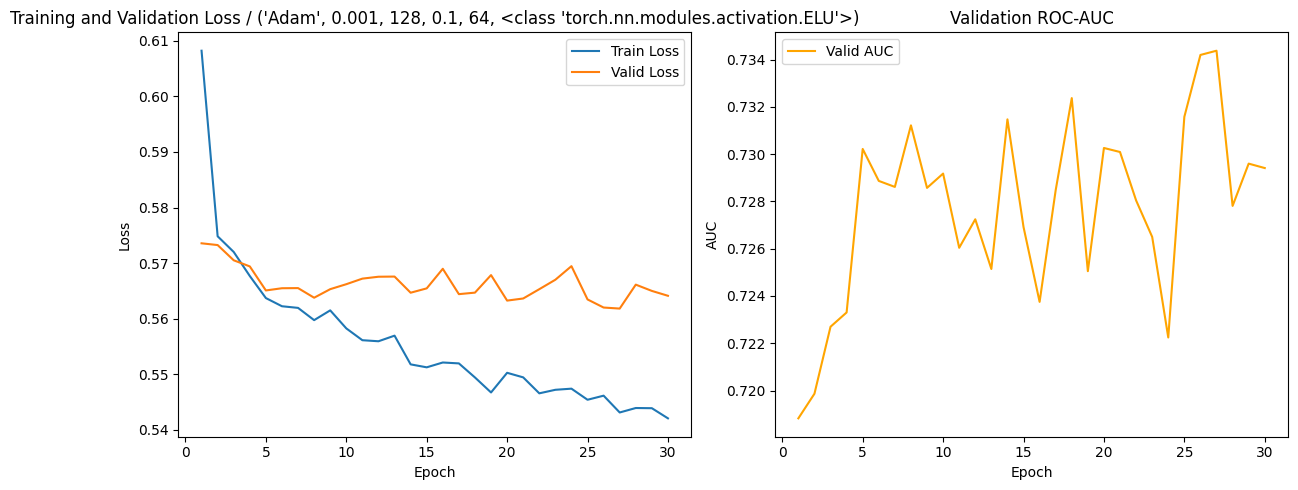

Epoch 1/30 - Train Loss: 0.6479, Valid Loss: 0.6076, Valid AUC: 0.6958
Epoch 2/30 - Train Loss: 0.6048, Valid Loss: 0.5879, Valid AUC: 0.7124
Epoch 3/30 - Train Loss: 0.5903, Valid Loss: 0.5834, Valid AUC: 0.7149
Epoch 4/30 - Train Loss: 0.5884, Valid Loss: 0.5778, Valid AUC: 0.7170
Epoch 5/30 - Train Loss: 0.5815, Valid Loss: 0.5786, Valid AUC: 0.7206
Epoch 6/30 - Train Loss: 0.5790, Valid Loss: 0.5742, Valid AUC: 0.7215
Epoch 7/30 - Train Loss: 0.5786, Valid Loss: 0.5715, Valid AUC: 0.7238
Epoch 8/30 - Train Loss: 0.5780, Valid Loss: 0.5767, Valid AUC: 0.7247
Epoch 9/30 - Train Loss: 0.5748, Valid Loss: 0.5724, Valid AUC: 0.7260
Epoch 10/30 - Train Loss: 0.5731, Valid Loss: 0.5697, Valid AUC: 0.7241
Epoch 11/30 - Train Loss: 0.5725, Valid Loss: 0.5704, Valid AUC: 0.7260
Epoch 12/30 - Train Loss: 0.5734, Valid Loss: 0.5701, Valid AUC: 0.7255
Epoch 13/30 - Train Loss: 0.5684, Valid Loss: 0.5686, Valid AUC: 0.7265
Epoch 14/30 - Train Loss: 0.5706, Valid Loss: 0.5680, Valid AUC: 0.7278
E

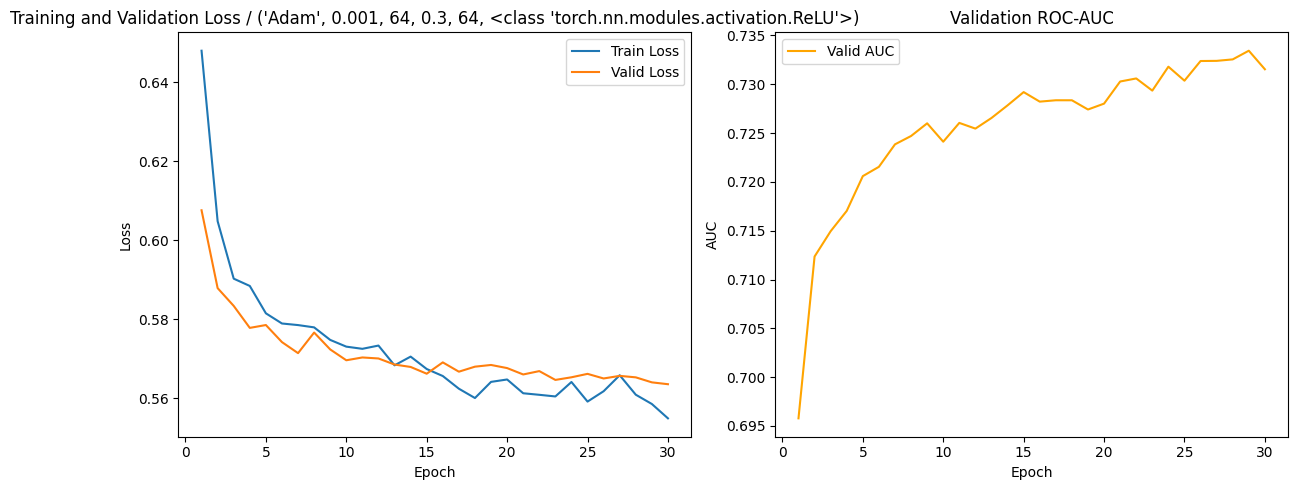

Epoch 1/30 - Train Loss: 0.6264, Valid Loss: 0.5974, Valid AUC: 0.7061
Epoch 2/30 - Train Loss: 0.6035, Valid Loss: 0.5873, Valid AUC: 0.7160
Epoch 3/30 - Train Loss: 0.5938, Valid Loss: 0.5838, Valid AUC: 0.7185
Epoch 4/30 - Train Loss: 0.5940, Valid Loss: 0.5823, Valid AUC: 0.7177
Epoch 5/30 - Train Loss: 0.5868, Valid Loss: 0.5819, Valid AUC: 0.7172
Epoch 6/30 - Train Loss: 0.5853, Valid Loss: 0.5796, Valid AUC: 0.7189
Epoch 7/30 - Train Loss: 0.5846, Valid Loss: 0.5795, Valid AUC: 0.7183
Epoch 8/30 - Train Loss: 0.5798, Valid Loss: 0.5788, Valid AUC: 0.7206
Epoch 9/30 - Train Loss: 0.5800, Valid Loss: 0.5752, Valid AUC: 0.7243
Epoch 10/30 - Train Loss: 0.5793, Valid Loss: 0.5766, Valid AUC: 0.7197
Epoch 11/30 - Train Loss: 0.5758, Valid Loss: 0.5745, Valid AUC: 0.7248
Epoch 12/30 - Train Loss: 0.5784, Valid Loss: 0.5747, Valid AUC: 0.7228
Epoch 13/30 - Train Loss: 0.5753, Valid Loss: 0.5745, Valid AUC: 0.7233
Epoch 14/30 - Train Loss: 0.5706, Valid Loss: 0.5731, Valid AUC: 0.7262
E

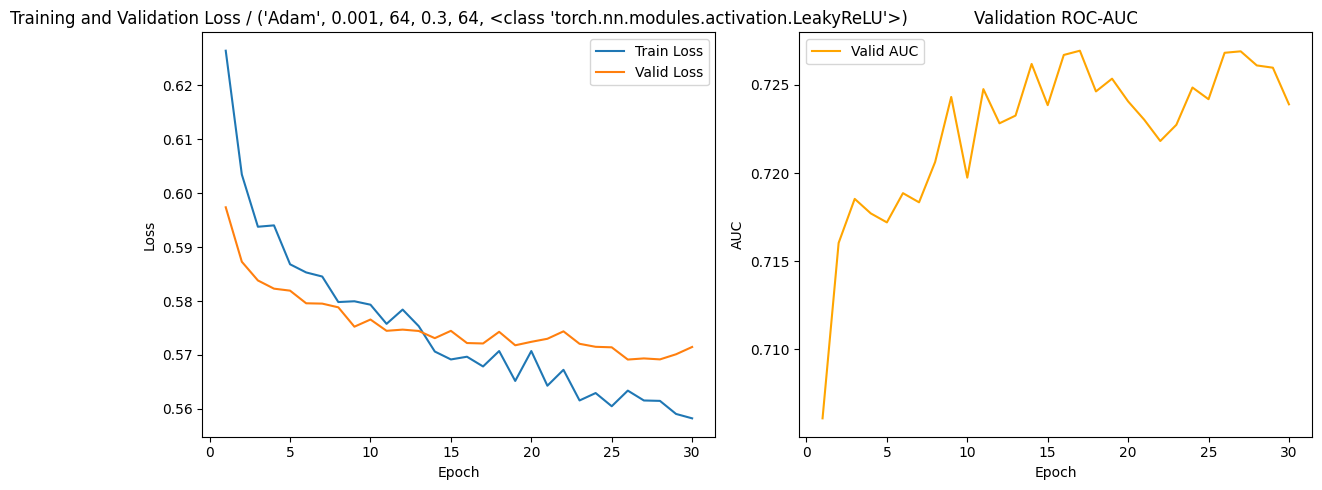

Epoch 1/30 - Train Loss: 0.6559, Valid Loss: 0.5943, Valid AUC: 0.7107
Epoch 2/30 - Train Loss: 0.5942, Valid Loss: 0.5767, Valid AUC: 0.7159
Epoch 3/30 - Train Loss: 0.5832, Valid Loss: 0.5708, Valid AUC: 0.7231
Epoch 4/30 - Train Loss: 0.5796, Valid Loss: 0.5699, Valid AUC: 0.7253
Epoch 5/30 - Train Loss: 0.5788, Valid Loss: 0.5685, Valid AUC: 0.7258
Epoch 6/30 - Train Loss: 0.5753, Valid Loss: 0.5698, Valid AUC: 0.7238
Epoch 7/30 - Train Loss: 0.5765, Valid Loss: 0.5687, Valid AUC: 0.7235
Epoch 8/30 - Train Loss: 0.5721, Valid Loss: 0.5670, Valid AUC: 0.7269
Epoch 9/30 - Train Loss: 0.5722, Valid Loss: 0.5684, Valid AUC: 0.7254
Epoch 10/30 - Train Loss: 0.5724, Valid Loss: 0.5682, Valid AUC: 0.7238
Epoch 11/30 - Train Loss: 0.5728, Valid Loss: 0.5669, Valid AUC: 0.7261
Epoch 12/30 - Train Loss: 0.5717, Valid Loss: 0.5674, Valid AUC: 0.7253
Epoch 13/30 - Train Loss: 0.5700, Valid Loss: 0.5656, Valid AUC: 0.7276
Epoch 14/30 - Train Loss: 0.5716, Valid Loss: 0.5651, Valid AUC: 0.7293
E

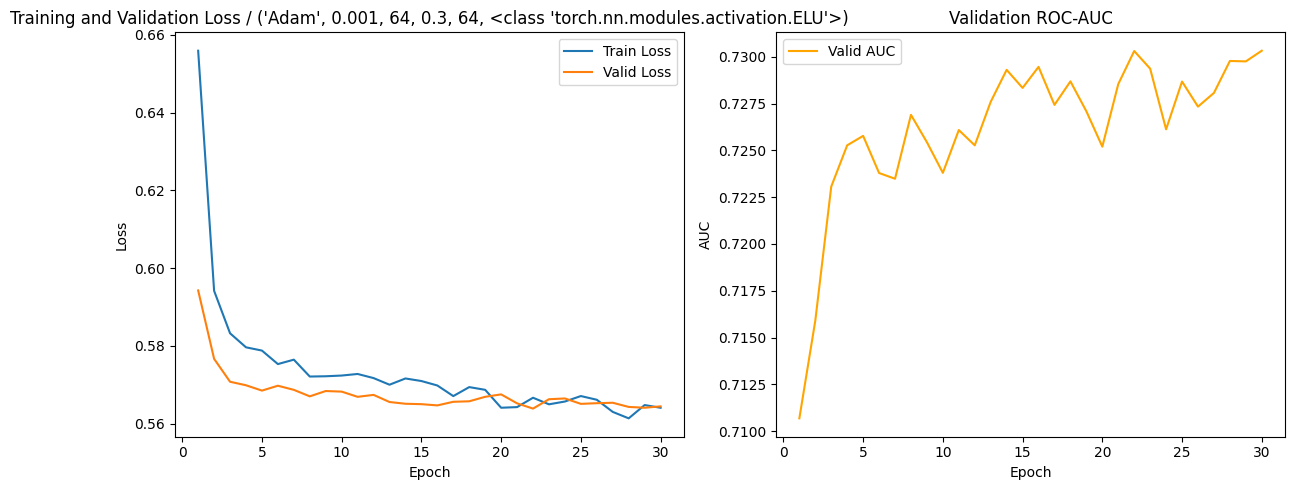

Epoch 1/30 - Train Loss: 0.6635, Valid Loss: 0.5906, Valid AUC: 0.7084
Epoch 2/30 - Train Loss: 0.5798, Valid Loss: 0.5730, Valid AUC: 0.7202
Epoch 3/30 - Train Loss: 0.5742, Valid Loss: 0.5709, Valid AUC: 0.7236
Epoch 4/30 - Train Loss: 0.5659, Valid Loss: 0.5666, Valid AUC: 0.7273
Epoch 5/30 - Train Loss: 0.5659, Valid Loss: 0.5663, Valid AUC: 0.7263
Epoch 6/30 - Train Loss: 0.5599, Valid Loss: 0.5673, Valid AUC: 0.7248
Epoch 7/30 - Train Loss: 0.5586, Valid Loss: 0.5654, Valid AUC: 0.7313
Epoch 8/30 - Train Loss: 0.5571, Valid Loss: 0.5633, Valid AUC: 0.7320
Epoch 9/30 - Train Loss: 0.5545, Valid Loss: 0.5653, Valid AUC: 0.7286
Epoch 10/30 - Train Loss: 0.5544, Valid Loss: 0.5639, Valid AUC: 0.7288
Epoch 11/30 - Train Loss: 0.5488, Valid Loss: 0.5662, Valid AUC: 0.7270
Epoch 12/30 - Train Loss: 0.5494, Valid Loss: 0.5651, Valid AUC: 0.7290
Epoch 13/30 - Train Loss: 0.5501, Valid Loss: 0.5658, Valid AUC: 0.7292
Epoch 14/30 - Train Loss: 0.5471, Valid Loss: 0.5645, Valid AUC: 0.7290
E

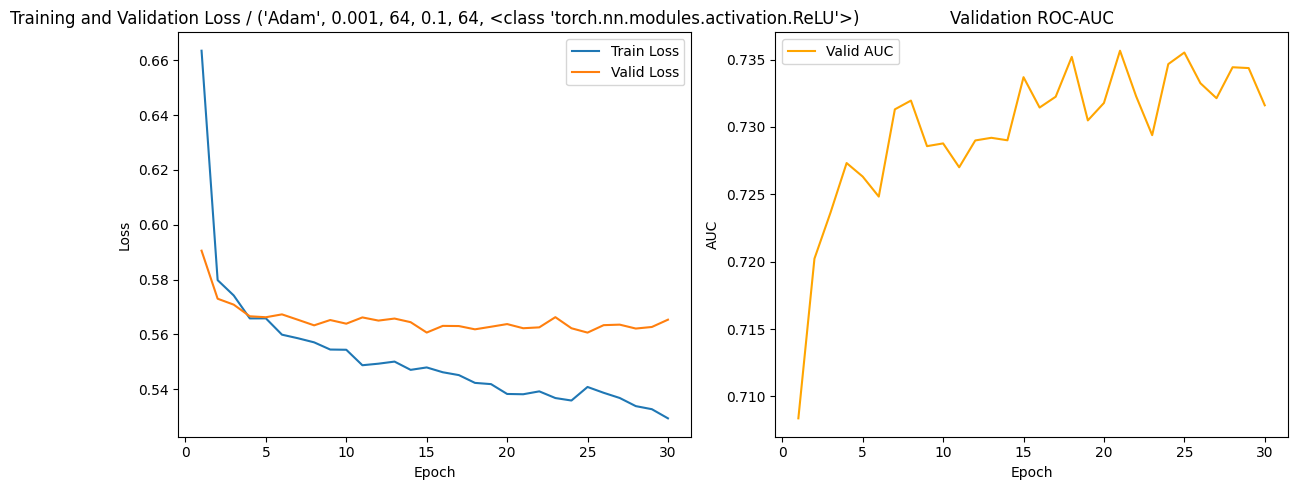

Epoch 1/30 - Train Loss: 0.6268, Valid Loss: 0.5942, Valid AUC: 0.7080
Epoch 2/30 - Train Loss: 0.5852, Valid Loss: 0.5690, Valid AUC: 0.7263
Epoch 3/30 - Train Loss: 0.5701, Valid Loss: 0.5679, Valid AUC: 0.7265
Epoch 4/30 - Train Loss: 0.5664, Valid Loss: 0.5655, Valid AUC: 0.7316
Epoch 5/30 - Train Loss: 0.5616, Valid Loss: 0.5621, Valid AUC: 0.7353
Epoch 6/30 - Train Loss: 0.5568, Valid Loss: 0.5620, Valid AUC: 0.7341
Epoch 7/30 - Train Loss: 0.5604, Valid Loss: 0.5611, Valid AUC: 0.7358
Epoch 8/30 - Train Loss: 0.5576, Valid Loss: 0.5616, Valid AUC: 0.7356
Epoch 9/30 - Train Loss: 0.5547, Valid Loss: 0.5631, Valid AUC: 0.7329
Epoch 10/30 - Train Loss: 0.5529, Valid Loss: 0.5650, Valid AUC: 0.7298
Epoch 11/30 - Train Loss: 0.5523, Valid Loss: 0.5623, Valid AUC: 0.7344
Epoch 12/30 - Train Loss: 0.5464, Valid Loss: 0.5623, Valid AUC: 0.7348
Epoch 13/30 - Train Loss: 0.5495, Valid Loss: 0.5636, Valid AUC: 0.7318
Epoch 14/30 - Train Loss: 0.5483, Valid Loss: 0.5630, Valid AUC: 0.7335
E

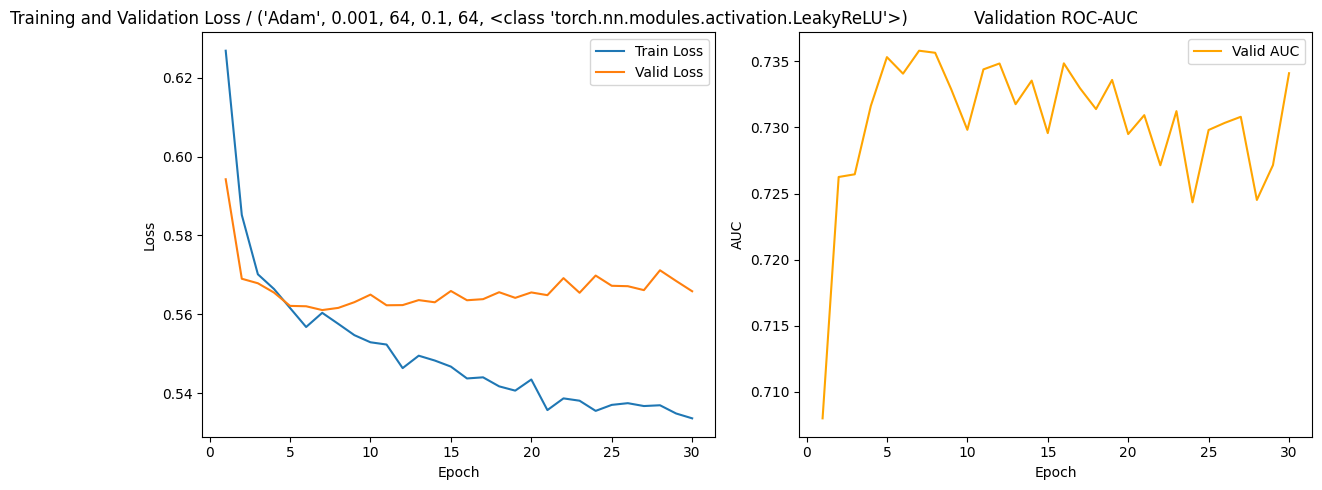

Epoch 1/30 - Train Loss: 0.6222, Valid Loss: 0.5831, Valid AUC: 0.7156
Epoch 2/30 - Train Loss: 0.5782, Valid Loss: 0.5705, Valid AUC: 0.7232
Epoch 3/30 - Train Loss: 0.5733, Valid Loss: 0.5694, Valid AUC: 0.7232
Epoch 4/30 - Train Loss: 0.5722, Valid Loss: 0.5687, Valid AUC: 0.7239
Epoch 5/30 - Train Loss: 0.5718, Valid Loss: 0.5693, Valid AUC: 0.7225
Epoch 6/30 - Train Loss: 0.5698, Valid Loss: 0.5667, Valid AUC: 0.7267
Epoch 7/30 - Train Loss: 0.5645, Valid Loss: 0.5657, Valid AUC: 0.7282
Epoch 8/30 - Train Loss: 0.5634, Valid Loss: 0.5661, Valid AUC: 0.7277
Epoch 9/30 - Train Loss: 0.5631, Valid Loss: 0.5677, Valid AUC: 0.7245
Epoch 10/30 - Train Loss: 0.5603, Valid Loss: 0.5651, Valid AUC: 0.7290
Epoch 11/30 - Train Loss: 0.5609, Valid Loss: 0.5644, Valid AUC: 0.7296
Epoch 12/30 - Train Loss: 0.5595, Valid Loss: 0.5656, Valid AUC: 0.7276
Epoch 13/30 - Train Loss: 0.5572, Valid Loss: 0.5634, Valid AUC: 0.7313
Epoch 14/30 - Train Loss: 0.5538, Valid Loss: 0.5661, Valid AUC: 0.7275
E

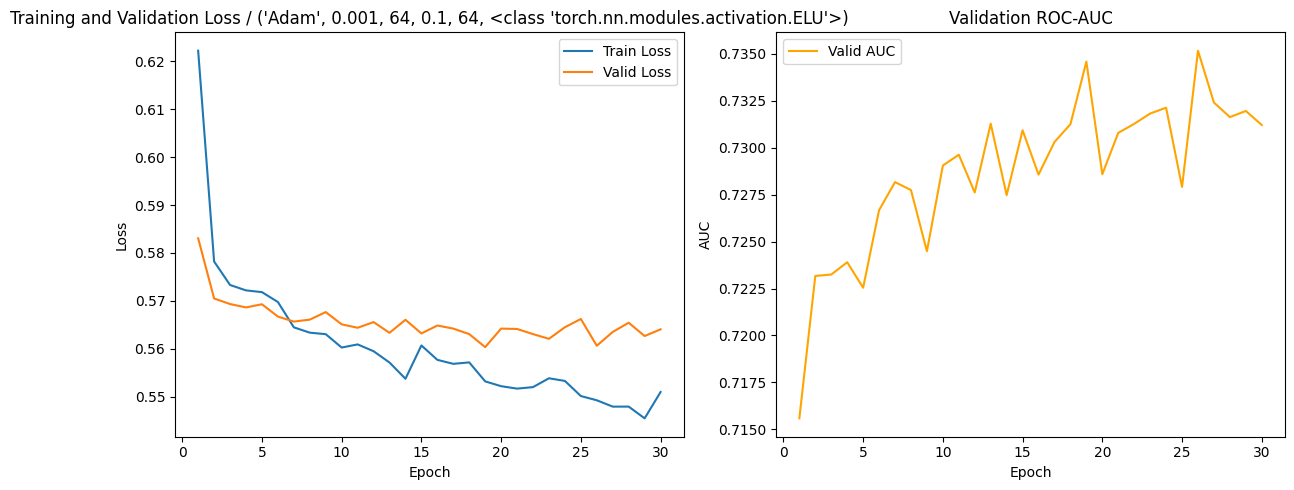

Best hyper-parameters: ('Adam', 0.001, 128, 0.3, 64, 'LeakyReLU', 28)
Best ROC-AUC: 0.7368424565791055


In [ ]:
from itertools import product
optimizer_lr_pairs = []
for opt in ['Adam']:  # 최적화된 옵티마이저로 고정
    for lr in [0.001]:  # 최적화된 학습률로 고정
        optimizer_lr_pairs.append((opt, lr))

first_size_options = [128, 64]  # 최적화된 첫 번째 층 크기로 고정
dropout_rate_options = [0.3, 0.1]  # 최적화된 드롭아웃 비율로 고정
batch_size_options = [64]  # 최적화된 배치 크기로 고정
activation_functions = [nn.ReLU, nn.LeakyReLU, nn.ELU]

all_combinations = product(optimizer_lr_pairs, first_size_options, dropout_rate_options, batch_size_options, activation_functions)

results = []
for combo in all_combinations:
    opt_lr, first_size, dropout_rate, batch_size, activation = combo
    opt_name, lr = opt_lr
    epoch, auc = train_and_evaluate(opt_name, lr, first_size, dropout_rate, batch_size, activation)
    results.append((opt_name, lr, first_size, dropout_rate, batch_size, activation.__name__, epoch, auc))

best_result = max(results, key=lambda x: x[-1])
print("Best hyper-parameters:", best_result[:-1])
print("Best ROC-AUC:", best_result[-1])

##### 모델 통째로 저장

In [ ]:
model = CreditRiskModel(34, 128, 0.3,nn.ReLU)  # 모델의 클래스를 먼저 정의해야 합니다.
model.load_state_dict(torch.load('/content/model/ReLU/model_16.pth'))

model.eval()  # 모델을 평가 모드로 설정

RuntimeError: PytorchStreamReader failed locating file data.pkl: file not found

##### 테스트 데이터 예측 (확률 예측)

In [ ]:
y_test_pred = model.predict(test_scaled).flatten()  # 확률 값 그대로 사용

# 제출 파일 생성
submission = pd.DataFrame({
    "UID": test_uid["UID"],
    "채무 불이행 확률": y_test_pred  # 확률값을 그대로 저장
})

# CSV 저장
submission.to_csv(r"/content/drive/MyDrive/FISA_기술세미나/Data/submission_17th.csv", index=False)

print("✅ 제출 파일 생성 완료! 'submission_17th.csv' 저장되었습니다.")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ 제출 파일 생성 완료! 'submission_17th.csv' 저장되었습니다.


In [ ]:
# 전처리 완료 된 테스트 데이터 셋 저장
test_scaled_df = pd.DataFrame(test_scaled)
test_scaled_df.columns = X.columns
test_scaled_df.to_csv(r"/content/drive/MyDrive/FISA_기술세미나/Data/test_scaled.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
train_df = pd.read_csv(r"/content/drive/MyDrive/MLDL_Project/data/train.csv")
test_df = pd.read_csv(r"/content/drive/MyDrive/MLDL_Project/data/test.csv")

# 2. UID 제거 & 타겟 분리
test_uid = test_df[["UID"]]
train_df.drop(columns=["UID"], inplace=True)
test_df.drop(columns=["UID"], inplace=True)

X = train_df.drop(columns=["채무 불이행 여부"])
y = train_df["채무 불이행 여부"].values

# 3. 범주형 데이터에 따른 부채확률 따로 구해 참고후 가중치 부여.
loan_period_map = {"단기 상환": 0, "장기 상환": 1}
loan_purpose_map = {
    "교통비": 0, "여행 자금": 1, "교육비": 2, "이사 비용": 3,
    "결혼 자금": 4, "사업 대출": 5, "투자금": 6, "자동차 구매": 7,
    "기타": 8, "부채 통합": 9, "휴가 비용": 10, "주택 개보수": 11
}
job_tenure_map = {
    "5년": 0, "4년": 1, "2년": 2, "6년": 3, "9년": 4,
    "3년": 5, "8년": 6, "10년 이상": 7, "7년": 8, "1년 미만": 9
}
housing_type_map = {"주택임대(월세 포함)": 0, "자가": 1, "주택담보대출(가구 중)": 2, "월세": 3}

col_loan_period = "대출 상환 기간"
col_loan_purpose = "대출 목적"
col_job_tenure = "현재 직장 근속 연수"
col_housing_type = "주거 형태"

for df in [X, test_df]:
    df[col_loan_period] = df[col_loan_period].map(loan_period_map)
    df[col_loan_purpose] = df[col_loan_purpose].map(loan_purpose_map)
    df[col_job_tenure] = df[col_job_tenure].map(job_tenure_map)
    df[col_housing_type] = df[col_housing_type].map(housing_type_map)

# 4. 함수 정의: Winsorizing & IQR capping
# 원저화: 극한값의 영향을 줄여줌.
# 이 코드에선 상위,하위 1%를 임계값으로 설정.
def winsorize_series(s, lower_quantile=0.01, upper_quantile=0.99):
    lower_val = s.quantile(lower_quantile)
    upper_val = s.quantile(upper_quantile)
    return s.clip(lower_val, upper_val)

# 1사분위수와 3사분위수 사이에서 1.5배를 넘는 값 잘라냄.
def iqr_capping(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + factor * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# 5. 로그 변환 대상 변수
#매우 큰 단위를 가지고 있는 다음 3개의 변수를 양의 왜도를 줄여 이상치영향을 줄임.
log_columns = ["현재 미상환 신용액", "월 상환 부채액", "현재 대출 잔액"]
for df in [X, test_df]:
    # Winsorizing & 로그 변환
    for col in log_columns:
        df[col] = winsorize_series(df[col], 0.01, 0.99)
        df[col] = np.log1p(df[col])

# 6. 파생 변수: "연체 없음"
X["연체 없음"] = (X["마지막 연체 이후 경과 개월 수"] == 0).astype(int)
test_df["연체 없음"] = (test_df["마지막 연체 이후 경과 개월 수"] == 0).astype(int)

# 7. 예: "연간 소득"에서도 상한선을 잘라내 이상치 완화.
for df in [X, test_df]:
    iqr_capping(df, "연간 소득", factor=1.5)

# 8. 결측치 처리(KNNImputer) & 스케일링
# 단순 평균대체보다 데이터의 구조를 더 반영하기위하여
# 결측치에 대하여 주변 25개의 샘플 평균값등을 사용하여 대체.
# 이후 단위를 정규화 시킴. (평균 0,분산1)
knn_imputer = KNNImputer(n_neighbors=25)
X_imputed = knn_imputer.fit_transform(X)
test_imputed = knn_imputer.transform(test_df)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled = scaler.transform(test_imputed)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MLDL_Project/data/train.csv'